# Paris Housing

In [1]:
#Importación de librerias

import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#Guardado del dataset en una variable 'df'
df = pd.read_csv('ParisHousing.csv')
df.head() #Leyendo los primeros datos del dataset

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
#Cantidad de filas y columnas
df.shape

(10000, 17)

In [4]:
#Primer vistazo general de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


# Data Wrangling

En esta etapa se dará la comprobación de valores nulos y duplicados, eliminación de outliers.

In [5]:
#Comprobando si hay nulos y duplicados en los datos

print('Duplicados: ', len(df[df.duplicated()]))
df.isnull().sum()

Duplicados:  0


squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

Como limpieza de datos en el dataset, eliminaremos la columna 'cityCode' ya que es irrelevante y no aporta al análisis ni al modelo, es solamente un identificador para las propiedades.

In [6]:
df = df.drop(['cityCode'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityPartRange      10000 non-null  int64  
 6   numPrevOwners      10000 non-null  int64  
 7   made               10000 non-null  int64  
 8   isNewBuilt         10000 non-null  int64  
 9   hasStormProtector  10000 non-null  int64  
 10  basement           10000 non-null  int64  
 11  attic              10000 non-null  int64  
 12  garage             10000 non-null  int64  
 13  hasStorageRoom     10000 non-null  int64  
 14  hasGuestRoom       10000 non-null  int64  
 15  price              10000 non-null  float64
dtypes: float64(1), int64(15

Se realiza el proceso de identificación de outliers en las variables que destacaremos como importantes en el dataset.

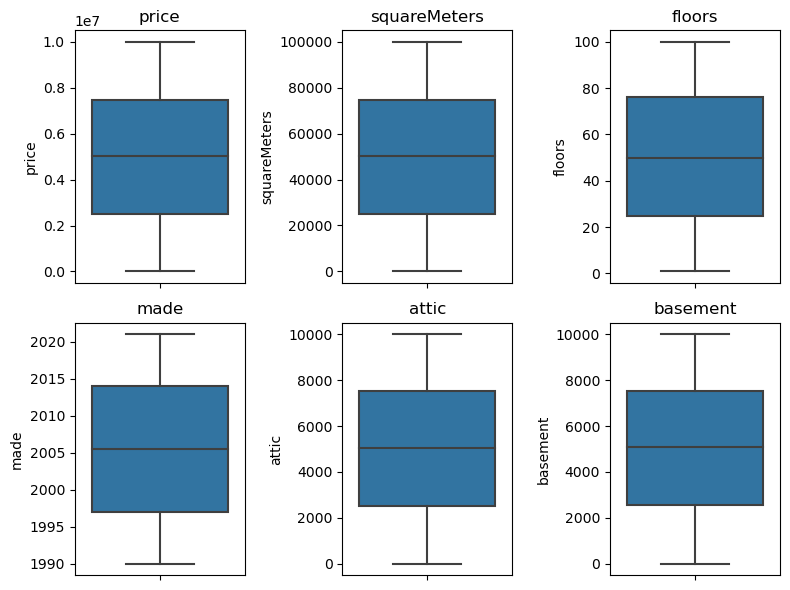

In [7]:
# Boxplots para encontrar outliers en las distintas variables a utilizar del dataset

fig, ax = plt.subplots(2, 3, figsize=(8,6))

# Price
sns.boxplot(data=df, y='price', ax=ax[0, 0])
ax[0, 0].set_title('price', color='black')

# squareMeters
sns.boxplot(data=df, y='squareMeters', ax=ax[0, 1])
ax[0, 1].set_title('squareMeters', color='black')

# floors
sns.boxplot(data=df, y='floors', ax=ax[0, 2])
ax[0, 2].set_title('floors', color='black')

# made
sns.boxplot(data=df, y='made', ax=ax[1, 0])
ax[1, 0].set_title('made', color='black')

# attic
sns.boxplot(data=df, y='attic', ax=ax[1, 1])
ax[1, 1].set_title('attic', color='black')

# basement
sns.boxplot(data=df, y='basement', ax=ax[1, 2])
ax[1, 2].set_title('basement', color='black')

plt.tight_layout()
plt.show()

Como se puede ver en los boxplots, no hay outliners en los datos a utilizar. Por lo que no se deberá realizar ningun cambio en los datos.

# EDA

Como primer paso se evaluarán algunas distribuciones de las variables destacadas.

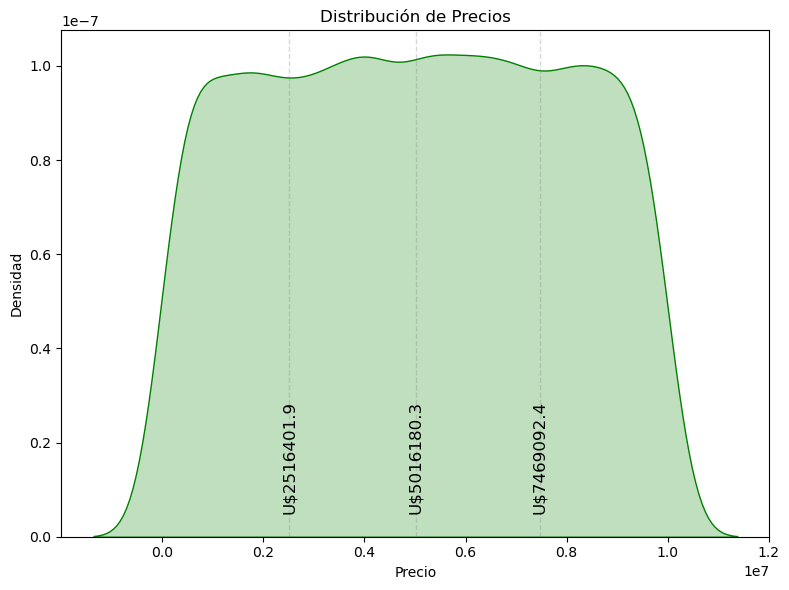

In [8]:
#Distribución de price, mostrando sus cuartiles

fig, ax = plt.subplots(figsize=(8,6))

sns.kdeplot(data=df, x='price', fill=True, ax=ax, color='green')
ax.set_title('Distribución de Precios')
ax.set_xlabel('Precio')
ax.set_ylabel('Densidad')

# Cuartiles
cuartiles = np.percentile(df['price'], [25, 50, 75])
for i, cuartil in enumerate(cuartiles):
    ax.axvline(cuartil, color='grey', linestyle='--', linewidth=1, alpha=0.3)
    ax.text(cuartil, 0.05, f'U${cuartil.round(1)}', color='black', 
                 transform=ax.get_xaxis_transform(), ha='center', va='baseline', rotation=90, size=12)

plt.tight_layout()
plt.show()

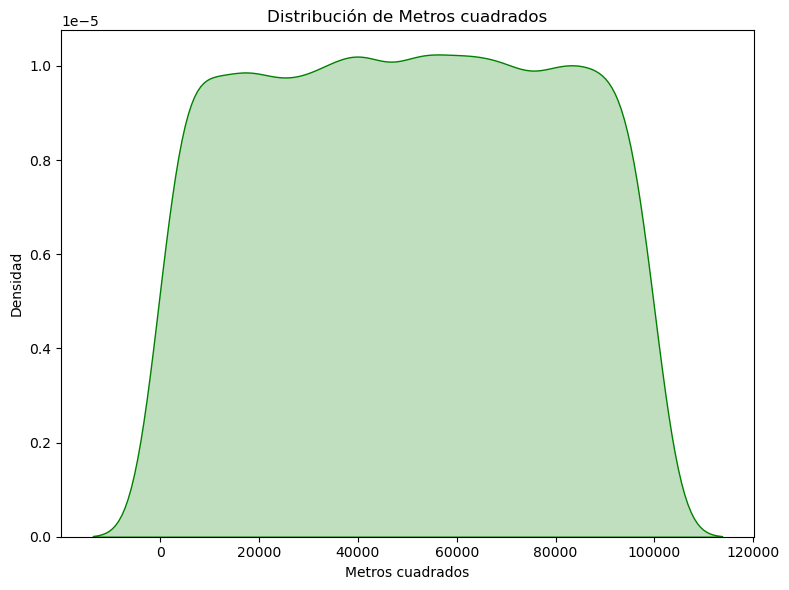

In [9]:
#Distribución de squareMeters

fig, ax = plt.subplots(figsize=(8,6))

sns.kdeplot(data=df, x='squareMeters', fill=True, ax=ax, color='green')
ax.set_title('Distribución de Metros cuadrados')
ax.set_xlabel('Metros cuadrados')
ax.set_ylabel('Densidad')

plt.tight_layout()
plt.show()

Se puede observar en los gráficos que se presenta una distribución multimodal en las dos variables. Dado esto es difícil determinar cuales son los valores más habituales.

Text(0.5, 1.0, 'Histograma de construcciones según los años')

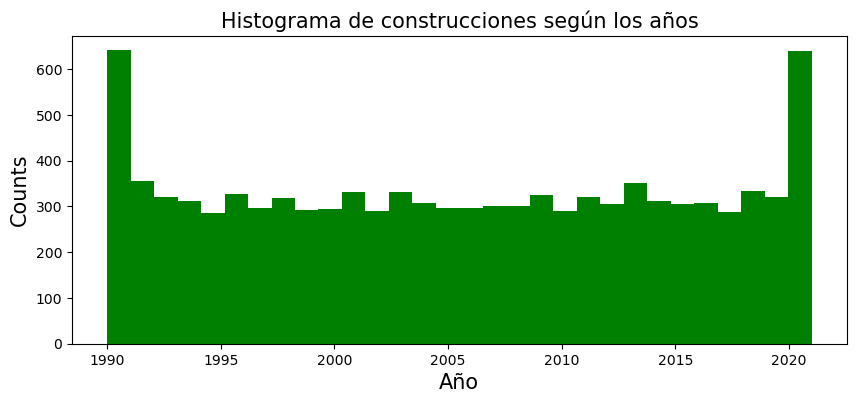

In [10]:
# Cantidad de casas por año

fig, ax = plt.subplots(figsize=(10,4))

plt.hist(x=df['made'], bins=30, color='green')
plt.xlabel('Año', fontsize=15)
plt.ylabel('Counts', fontsize=15) 
plt.title('Histograma de construcciones según los años', fontsize=15)

Este gráfico muestra la cantidad de construcciones por año, hay un pico de construcciones en 1990 y luego del 2020.

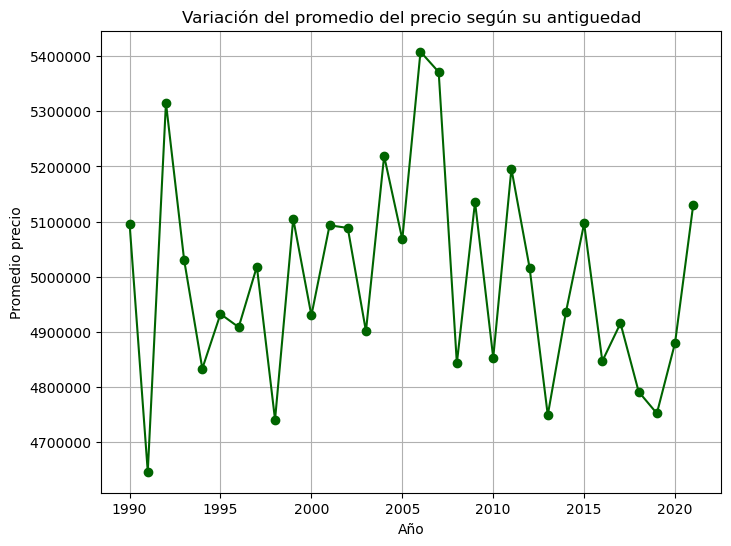

In [11]:
#Variación del promedio del precio según su antiguedad

mediaAnio = df.groupby('made')['price'].mean()
mediaAnio.reset_index()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(mediaAnio, marker='o', color='darkgreen')

ax.set_title('Variación del promedio del precio según su antiguedad')
ax.set_xlabel('Año')
ax.set_ylabel('Promedio precio')

ax.grid()
ax.ticklabel_format(style='plain', axis='y')

En este gráfico de linea se visualiza la variación del precio según la antiguedad de las propiedades. Hay un pico de precios rondando el año 2006 y 2007, pero luego se mantiene variante, no existe una correlación clara entre estas dos variables.

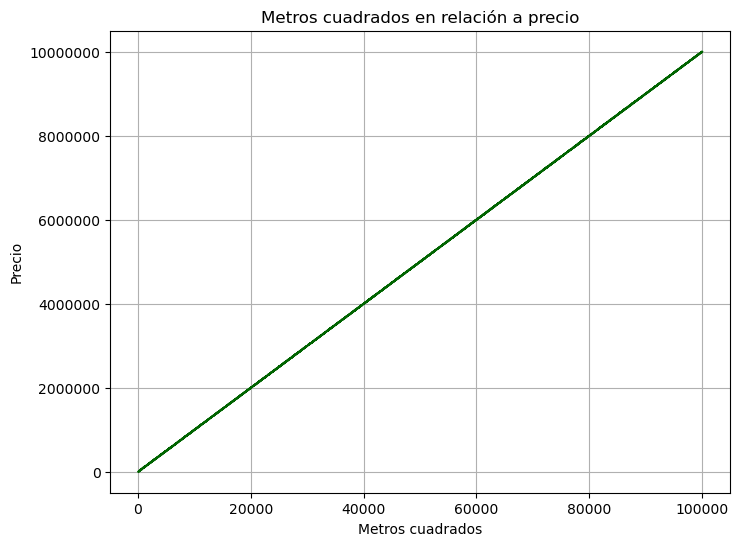

In [12]:
#Grafico de linea sobre la reación entre el precio y el los metros cuadrados

fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(y='price',x='squareMeters',data=df, color='darkgreen')

ax.set_title('Metros cuadrados en relación a precio')
ax.set_xlabel('Metros cuadrados')
ax.set_ylabel('Precio')

ax.grid()
ax.ticklabel_format(style='plain', axis='y')

Podemos comprobar que existe una muy fuerte relación entre el precio y los metros cuadrados que tienen las propiedades. Esta relación tiene una pendiente positiva tal como se predijo en la hipótesis.

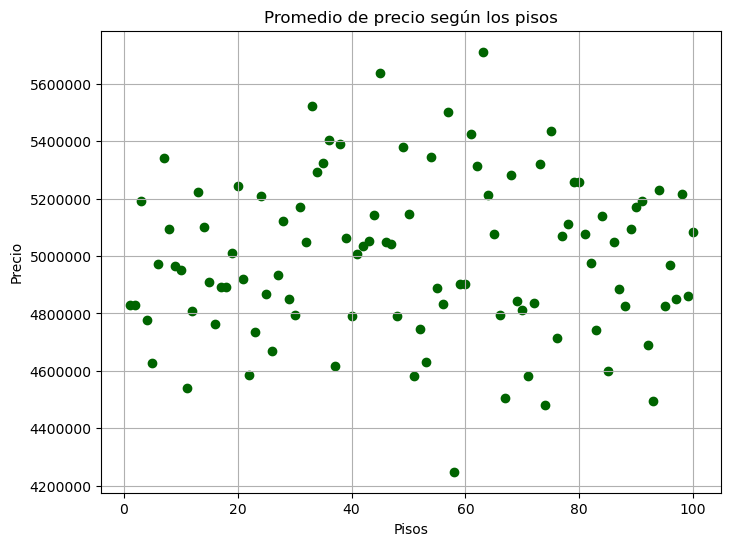

In [13]:
#Grafico sobre la reación entre el promedio del precio según los pisos

prom = df.groupby('floors')['price'].mean()
prom.reset_index()

fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x=prom.index,y=prom.values, color='darkgreen')

ax.set_title('Promedio de precio según los pisos')
ax.set_xlabel('Pisos')
ax.set_ylabel('Precio')

ax.grid()
ax.ticklabel_format(style='plain', axis='y')

No existe relación entre los pisos y el precio

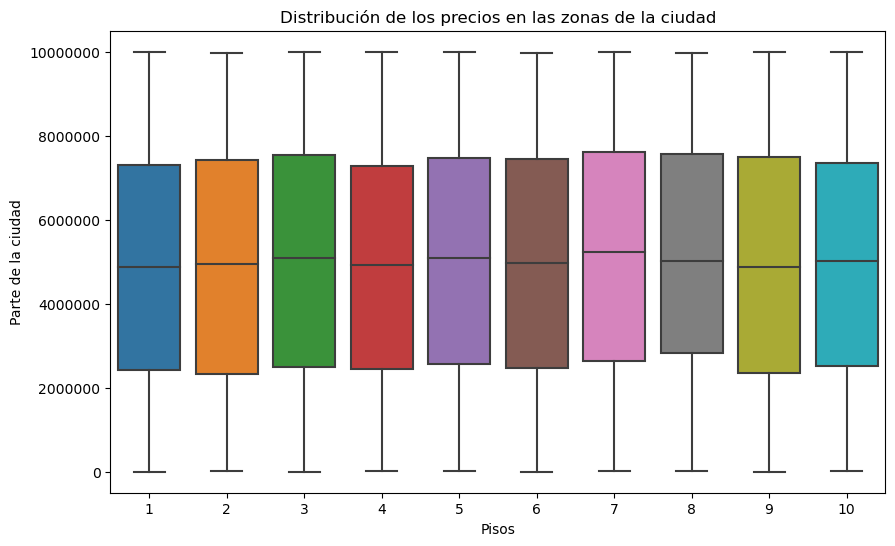

In [14]:
#Distribución de los precios en base a las distintas zonas de la ciudad

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, x='cityPartRange', y='price', ax=ax)

ax.set_title('Distribución de los precios en las zonas de la ciudad')
ax.set_xlabel('Pisos')
ax.set_ylabel('Parte de la ciudad')

ax.ticklabel_format(style='plain', axis='y')

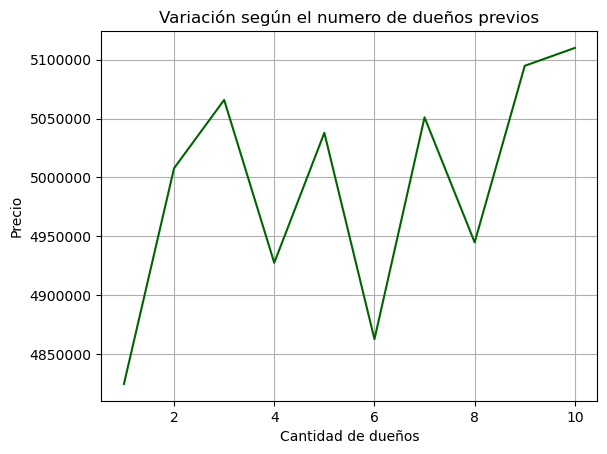

In [15]:
#Promedio de precios en relacion al numero de dueños anteriores

fig, ax = plt.subplots()

prom = df.groupby('numPrevOwners')['price'].mean()
prom.reset_index()

plt.plot(prom.index, prom.values, color='darkgreen')

ax.set_title('Variación según el numero de dueños previos')
ax.set_xlabel('Cantidad de dueños')
ax.set_ylabel('Precio')

ax.grid()
ax.ticklabel_format(style='plain', axis='y')

Aqui se puede ver que hay un pico en el numero 10, sin embargo no hay una relación lineal entre estas.

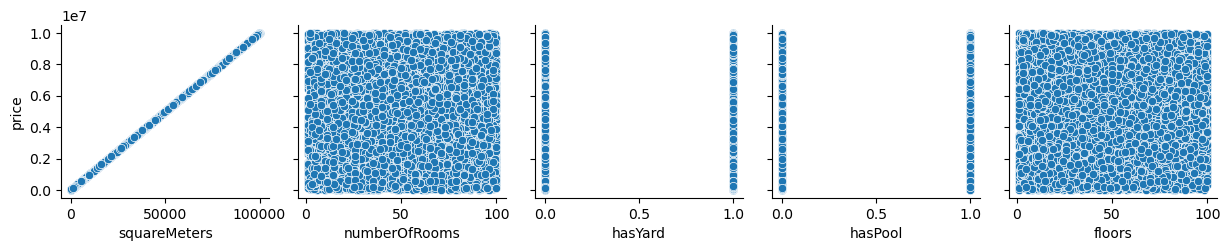

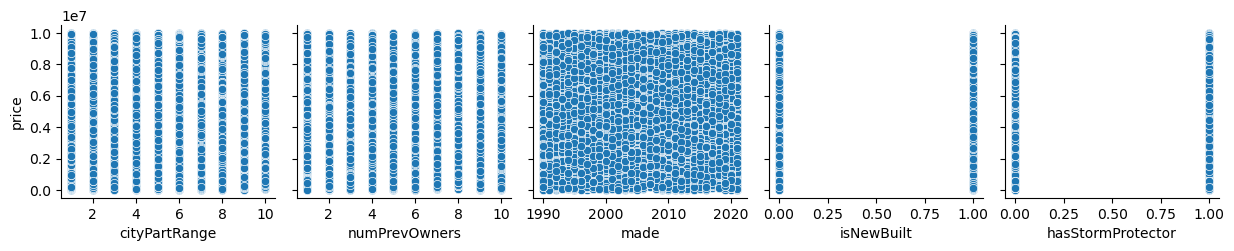

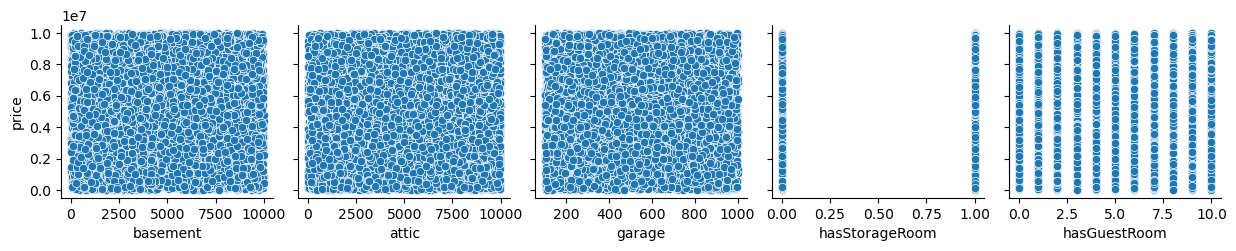

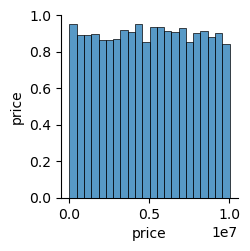

In [16]:
#Pairplot del tarjet vs todas las demás variables

for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df, x_vars=df.columns[i:i+5], y_vars=['price'])

Se puede comprobar que la unica correlación del tarjet es con los metros cuadrados de cada casa.

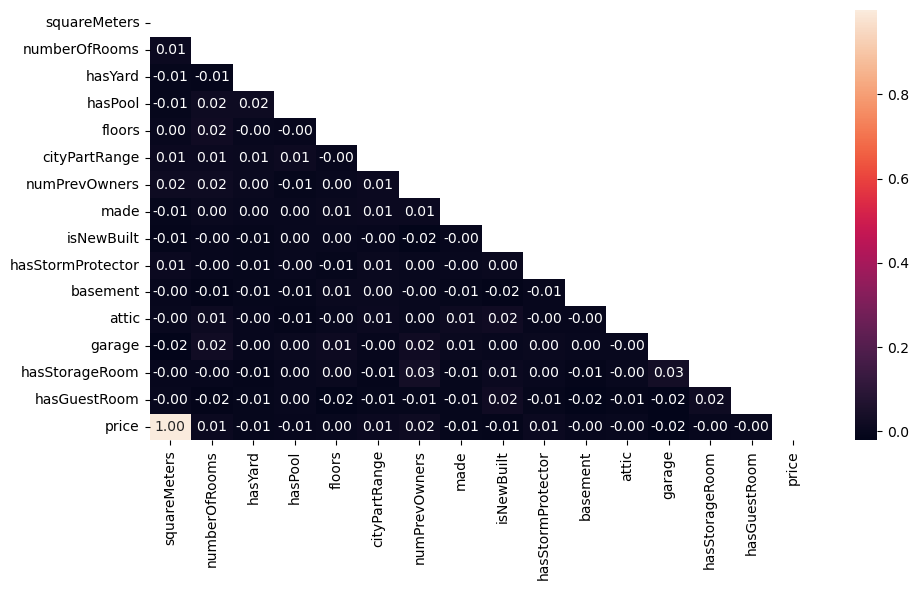

In [17]:
# Grafico de correlaciónes

fig, ax = plt.subplots(figsize=(10,6))

mascara = np.triu(np.ones_like(df.corr(),dtype = bool))

sns.heatmap(df.corr(), mask = mascara, fmt = ".2f",
            annot=True, 
            ax=ax)

plt.tight_layout()

Podemos comprobar en este mapa de calor que la única variable que tiene correlación con el precio es squareMeters (tiene 1.0 de correlación).
Esto responde la pregunta de si habían más variables relacionadas con el precio, ya que todas las demas variables en relación al precio dan menos de 0,0 de correlación.

Como resultado del análisis, podemos comprobar que la única variable que se relaciona con 'price' es 'squareMeters', de forma lineal positiva, existe una fuerte correlación entre estas dos variables.
Los datos son uniformes de tal manera que no hay distribuciónes normales.
La zona, y la epoca en la que se hicieron no tienen relacion con el precio.
No se encotraron anomalías en los datos.

# Feature Engineer

Se creará una nueva variable a partir de la variable 'made', esta se llamará 'age' y son los años que tiene la propiedad.

In [18]:
current_year=datetime.datetime.now().year
df['ageOfProperty']=current_year - df['made']
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,ageOfProperty
0,75523,3,0,1,63,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,19
1,80771,39,1,1,98,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,9
2,55712,58,0,1,19,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,3
3,32316,47,0,0,6,10,4,2012,0,1,659,7141,359,0,3,3232561.2,12
4,70429,19,1,1,90,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,34


# Entrenamiento de modelos

In [19]:
# Separación del modelo en train y test

X = df.drop(columns=['price'])  # Variables
y = df['price']  # Target

# Normalizando los datos numericos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Se da el 30% para el train y el 70% para el test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Se probarán varios modelos y en base a los resultados se tomarán los mejores para realizar la busqueda de hiperparámetros. Los modelos se verificarán usando mean_squeared_error (mientras más chico sea este valor menos errores tiene el modelo) para verificar el rendimiento del modelo. Además del r2 para ver el porcentaje de aciertos del modelo.

In [20]:
#LINEAR REGRESSION

model = LinearRegression() # Creando el modelo
model.fit(X_train, y_train) # Entrenando el modelo
y_pred = model.predict(X_test) # Se realizan las predicciones de test

#Se calculan las metricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'El MSE es: {mse}')
print(f'El MAE es: {mae}')
print(f'El r2 es: {r2}')

El MSE es: 3606042.8765321025
El MAE es: 1485.110225807766
El r2 es: 0.999999577062993


In [21]:
#lASSO

model = Lasso() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'El MSE es: {mse}')
print(f'El MAE es: {mae}')
print(f'El r2 es: {r2}')

El MSE es: 3605940.2211064515
El MAE es: 1485.0687105502004
El r2 es: 0.9999995770750331


In [22]:
#SVR

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'El MSE es: {mse}')
print(f'El MAE es: {mae}')
print(f'El r2 es: {r2}')

El MSE es: 8540164140728.592
El MAE es: 2536538.6871200986
El r2 es: -0.0016385229993567396


In [23]:
#Random Forest Regressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'El MSE es: {mse}')
print(f'El MAE es: {mae}')
print(f'El r2 es: {r2}')

El MSE es: 16427422.841343537
El MAE es: 3222.154249833277
El r2 es: 0.9999980732993792


In [24]:
#KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'El MSE es: {mse}')
print(f'El MAE es: {mae}')
print(f'El r2 es: {r2}')

El MSE es: 1821939136197.3657
El MAE es: 1106770.91292
El r2 es: 0.7863127224133467


Se puede observar como los errores en LinearRegression, Lasso y RandomForestRegressor son mucho menores, esto es ya que la correlación más grande se da entre dos variables de forma lineal, entre 'price' y 'squareMeters'.
Se tomarán estos modelos para su selección de hiperparámetros, por su gran diferencia contra los demás modelos, son los más adecuados para este caso.
LinarRegressión no tiene hiperparámetros como para realizar una búsqueda de los mismos, por lo que utilizaremos Lasso y RandomForestRegressor para esto, utilizando KFold para evitar el overfitting.

En este proyecto, no se vió necesario ni adecuado realizar un PCA, ya que la correlación es dada por dos variables.

# Búsqueda Hiperparametros

Se utilizará K-Fold Cross Validation para el entrenamiento del modelo. Además de utilizar GridSeacrch para la busqueda de los hiperparámetros más óptimos.
La primera prueba será sin hiperparámetros, para luego realizar la búsqueda de los mismos.

Búsqueda de los mejores hiperparámetros para cada modelo utilizando GridSearchCV

# Lasso

In [25]:
#Creamos nuestro KFold para utilzar con los dos modelos a evaluar, en este caso dividiremos en 5 folds.
kf =KFold(n_splits=5, shuffle=True, random_state=42)

# Grilla de hiperparámetros 
params = {'alpha' : [0.1, 0.2, 0.5, 1]}

estimator = Lasso() # Estimator - nuestro modelo Lasso

search = GridSearchCV(estimator, params, cv=kf, scoring='r2', n_jobs=-1) # Creando el GridSearch
search.fit(X_train, y_train) # Entrenando...

parametros = search.best_params_ # Mejores parámetros
best_estimator = search.best_estimator_ # Mejor modelo

# Predicciones del mejor modelo
y_test_pred = best_estimator.predict(X_test)
y_train_pred = best_estimator.predict(X_train)

# r2 de test y train
r2_test = r2_score(y_test,y_test_pred)
r2_train = r2_score(y_train,y_train_pred)

print(f"Score r2 para valores train : {r2_train}")
print(f"Score r2 para valores test : {r2_test}")
print(f"Parametros: {parametros}")

Score r2 para valores train : 0.9999995593384788
Score r2 para valores test : 0.9999995770750331
Parametros: {'alpha': 1}


Se puede ver un excelente desempeño de este modelo, la predicción tanto en test como en train es del 99%.
En este caso el hiperparámetro alpha presenta grandes cambios.

# RandomForestRegressor

In [26]:
#Creamos nuestro KFold para utilzar con los dos modelos a evaluar, en este caso dividiremos en 5 folds.
kf =KFold(n_splits=5, shuffle=True, random_state=42)

# Grilla de hiperparámetros 
params = {'n_estimators': [150, 200],  # Número de árboles en el bosque
    'max_depth': [4,6],  # Profundidad máxima de cada árbol
    'min_samples_split': [2,4],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [2,4],  # Número mínimo de muestras requeridas en cada hoja del árbol
         }
estimator = RandomForestRegressor() # Estimator - nuestro modelo RandomForestRegressor

search = GridSearchCV(estimator, params, cv=kf, scoring='r2', n_jobs=-1) # Creando el GridSearch
search.fit(X_train, y_train) # Entrenando...

parametros = search.best_params_ # Mejores parámetros
best_estimator = search.best_estimator_ # Mejor modelo

# Predicciones del mejor modelo
y_test_pred = best_estimator.predict(X_test)
y_train_pred = best_estimator.predict(X_train)

# r2 de test y train
r2_test = r2_score(y_test,y_test_pred)
r2_train = r2_score(y_train,y_train_pred)

print(f"Score r2 para valores train : {r2_train}")
print(f"Score r2 para valores test : {r2_test}")
print(f"Parametros: {parametros}")

Score r2 para valores train : 0.9999463094888792
Score r2 para valores test : 0.9999455138574325
Parametros: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


La configuración de hiperparámetros mejoró un poco más la exactitud del modelo.

# Conclusión

Se puede observar una clara relación lineal, se intuye que que la formula por la cuál se calcula 'price' está directamente relacionada con 'squeareMeters' y una constante que lo afecte. Como resultado se un gran porcentaje de precisión en los modelos.

Hablando de los modelos, podemos decir que tanto RandomForestRegressor tanto como Lasso y LinearRegression fueron muy eficaces, mostrando unos muy buenos resultados. Sin embargo, el modelo que se utilizará será LinearRegressor. Este es un modelo mucho más simple, para este que es un caso de regresión lineal simple. Utilizar un modelo complejo complejo para resolver este problema es inadecuado si hay un modelo más sencillo que logra cumplir con todas las expectativas.